In [1]:

import pandas as pd
import numpy as np
import sqlite3
import folium
import matplotlib as plt
import pandas as pd
import pandasql as ps
import plotly.express as px

ModuleNotFoundError: No module named 'pandasql'

In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandasql


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pygal


Note: you may need to restart the kernel to use updated packages.


In [ ]:
brew install cairo


SyntaxError: invalid syntax (2455951342.py, line 1)

In [ ]:
pip install cairosvg


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Declaration of colors and color palettes for visualization
plot_dictcolor = {'Property damage only': 'rgb(104,158,207)',
                  'Severe injury':        'rgb(245,87,91)',
                  'Other injury':         'rgb(245,162,87)',
                  'Fatal':                'rgb(161,161,161)',
                  'Pain':                 'rgb(245,214,87)'}

plot_dictcolor = {'Property damage only': 'rgb(104,158,207)',
                  'Severe injury':        'rgb(245,87,91)',
                  'Other injury':         'rgb(245,162,87)',
                  'Fatal':                'rgb(161,161,161)',
                  'Pain':                 'rgb(245,214,87)'}

plot_bgcolor = 'rgb(249,249,249)'
plot_linecolor = 'rgb(120,161,120)'

In [3]:
import os
curDir = os.getcwd()
print(curDir) 

c:\Users\kelsey\Desktop\Fall Quarter\BANA 212 - Data and Programming Analytics\TeamProject


In [4]:
conn=sqlite3.connect(curDir + '\\switrs.sqlite')

cursor = conn.cursor()

Take a look for each table 

In [5]:
#each dataset

df_collision=pd.read_sql_query(
    """SELECT * 
    FROM collisions
    LIMIT 10 """, conn)

df_collision['process_date'].max()

'2020-09-30'

In [6]:
#clean collision data

df_collision

,case_id,jurisdiction,officer_id,reporting_district,chp_shift,population,county_city_location,county_location,special_condition,beat_type,...,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,primary_ramp,secondary_ramp,latitude,longitude,collision_date,collision_time,process_date
0,0081715,1941,11342,212,not chp,>250000,1941,los angeles,0,not chp,...,0,0,0,None,None,NaN,NaN,2020-03-14,07:45:00,2020-06-22
1,0726202,3600,8945,064,not chp,50000 to 100000,3612,san bernardino,0,not chp,...,0,0,0,None,None,NaN,NaN,2020-07-26,02:50:00,2020-09-30
2,3858022,1005,P379,2C,not chp,>250000,1005,fresno,0,not chp,...,0,0,0,None,None,NaN,NaN,2009-02-03,17:11:00,2009-04-27
3,3899441,9120,17248,None,2200 thru 0559,2500 to 10000,0801,del norte,0,chp state highway,...,0,0,0,None,None,NaN,NaN,2009-02-28,01:45:00,2009-11-02
4,3899442,9530,19005,None,0600 thru 1359,>250000,1942,los angeles,0,chp state highway,...,0,0,0,None,None,33.86465,-118.28533,2009-02-09,10:20:00,2010-01-14
5,3899445,9530,19284,None,1400 thru 2159,>250000,1942,los angeles,0,chp state highway,...,0,0,0,None,None,33.79120,-118.28230,2009-02-18,15:50:00,2010-01-13
6,3899446,9530,19289,None,1400 thru 2159,25000 to 50000,1939,los angeles,0,chp state highway,...,0,0,0,None,None,33.88450,-118.35260,2009-02-11,17:35:00,2010-01-11
7,3899449,9530,19374,None,1400 thru 2159,>250000,1941,los angeles,0,chp state highway,...,0,0,0,None,None,33.83197,-118.20906,2009-02-13,21:20:00,2009-12-30
8,3899450,9530,19374,None,1400 thru 2159,>250000,1941,los angeles,0,chp state highway,...,0,0,0,None,None,33.82693,-118.20770,2009-02-13,20:40:00,2009-12-30
9,3899453,9530,18723,None,1400 thru 2159,unincorporated,1900,los angeles,0,chp state highway,...,0,0,0,None,None,33.87343,-118.20861,2009-02-13,18:20:00,2010-01-12


In [8]:
df_case_ids=pd.read_sql_query(
    """select * from case_ids
    LIMIT 5""", conn)

df_case_ids

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


In [ ]:
df_victims=pd.read_sql_query(
    """select * from victims""", conn)


df_victims

,id,case_id,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
0,1,3858022,1,passenger,female,24.0,no injury,passenger seat 4,air bag not deployed,None,not ejected
1,2,3858022,1,passenger,male,31.0,no injury,passenger seat 6,air bag not deployed,None,not ejected
2,3,3899450,1,driver,female,72.0,complaint of pain,driver,air bag not deployed,lap/shoulder harness used,not ejected
3,4,3899453,2,driver,male,66.0,complaint of pain,driver,air bag deployed,lap/shoulder harness used,not ejected
4,5,3899453,3,passenger,male,65.0,no injury,passenger seat 3,air bag not deployed,lap/shoulder harness used,not ejected
...,...,...,...,...,...,...,...,...,...,...,...
9639329,7381156,8054630,1,bicyclist,male,36.0,other visible injury,position unknown,"driver, motorcycle helmet not used",None,fully ejected
9639330,7435596,8112338,2,driver,None,59.0,complaint of pain,driver,"passenger, motorcycle helmet used",None,not ejected
9639331,7444031,8121975,1,driver,female,17.0,complaint of pain,driver,air bag not deployed,lap/shoulder harness used,not ejected
9639332,7691637,90219813,2,passenger,female,15.0,complaint of pain,passenger seat 4,not required,lap/shoulder harness used,not ejected


In [5]:
df_collisions=pd.read_sql_query(
    """select * from collisions""", conn)

df_collisions = df_collisions.dropna()
df_collisions.head(10)

In [ ]:
df_parties=pd.read_sql_query(
    """select * from parties""", conn)


df_parties

In [ ]:
df_victims = df_victims.dropna()
df_case_ids = df_case_ids.dropna()
df_collisions = df_collisions.dropna()
df_parties = df_parties.dropna()


df_victims

,id,case_id,party_number,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equipment_1,victim_safety_equipment_2,victim_ejected
2,3,3899450,1,driver,female,72.0,complaint of pain,driver,air bag not deployed,lap/shoulder harness used,not ejected
3,4,3899453,2,driver,male,66.0,complaint of pain,driver,air bag deployed,lap/shoulder harness used,not ejected
4,5,3899453,3,passenger,male,65.0,no injury,passenger seat 3,air bag not deployed,lap/shoulder harness used,not ejected
7,8,3899457,1,passenger,female,60.0,no injury,passenger seat 3,air bag not deployed,lap/shoulder harness used,not ejected
8,9,3899457,2,passenger,female,1.0,no injury,passenger seat 6,air bag not deployed,child restraint in vehicle used,not ejected
...,...,...,...,...,...,...,...,...,...,...,...
9639327,7380724,8054130,1,passenger,male,45.0,no injury,passenger seat 3,air bag not deployed,lap/shoulder harness used,not ejected
9639328,7380726,8054130,2,passenger,male,23.0,complaint of pain,passenger seat 3,air bag deployed,lap/shoulder harness used,not ejected
9639331,7444031,8121975,1,driver,female,17.0,complaint of pain,driver,air bag not deployed,lap/shoulder harness used,not ejected
9639332,7691637,90219813,2,passenger,female,15.0,complaint of pain,passenger seat 4,not required,lap/shoulder harness used,not ejected


In [ ]:
df_parties=pd.read_sql_query(
    """select * from parties
    LIMIT 10 """, conn)


df_parties.head()

,id,case_id,party_number,party_type,at_fault,party_sex,party_age,party_sobriety,party_drug_physical,direction_of_travel,...,other_associate_factor_2,party_number_killed,party_number_injured,movement_preceding_collision,vehicle_year,vehicle_make,statewide_vehicle_type,chp_vehicle_type_towing,chp_vehicle_type_towed,party_race
0,1,0081715,1,driver,1,female,35.0,not applicable,not applicable,north,...,None,0,0,proceeding straight,2007,ford,None,None,None,other
1,2,0081715,2,driver,0,female,43.0,not applicable,not applicable,north,...,None,0,0,proceeding straight,2019,None,None,None,None,hispanic
2,3,0726202,1,driver,1,None,NaN,impairment unknown,G,north,...,None,0,0,proceeding straight,2005,None,passenger car,"passenger car, station",None,None
3,4,3858022,1,driver,1,male,47.0,impairment unknown,G,east,...,None,0,0,None,2007,dodge,emergency vehicle,police car,00,black
4,5,3858022,2,driver,0,male,58.0,had not been drinking,None,east,...,None,0,0,None,2006,nissan,None,None,00,hispanic


In [ ]:
#time duration coverd by database



df_time = pd.read_sql_query(
    """
SELECT MIN(cast(collision_date as DATE)) as 'lowest date',
       MAX(cast(collision_date as DATE)) as 'highest date'
FROM collisions;

    """, conn)


#clean missing data 
df_time = df_time.dropna() 
#clean duplicate data 
df_time = df_time.drop_duplicates()

df_time


,lowest date,highest date
0,2001,2021


In [ ]:
# How many accidents were recorded?
df_total = pd.read_sql_query(
    """
    SELECT COUNT(case_id) AS Number_of_road_incidents
    FROM collisions;
    """, conn)

#clean missing data 
df_total = df_total.dropna() 
#clean duplicate data 
df_total = df_total.drop_duplicates()

df_total

,Number_of_road_incidents
0,9424334


In [ ]:
#collision for sex

df_parties_sex=pd.read_sql_query(
    """select party_sex, count(party_sex) as collision_sex
    from parties
    GROUP BY party_sex
     """, conn)

#clean missing data 
df_parties_sex = df_parties_sex.dropna() 
#clean duplicate data 
df_parties_sex = df_parties_sex.drop_duplicates()

df_parties_sex['percentage'] = (df_parties_sex['collision_sex'] / df_parties_sex['collision_sex'].sum()) * 100

df_parties_sex


,party_sex,collision_sex,percentage
1,X,4028,0.024910
2,female,6258217,38.702346
3,male,9907878,61.272744


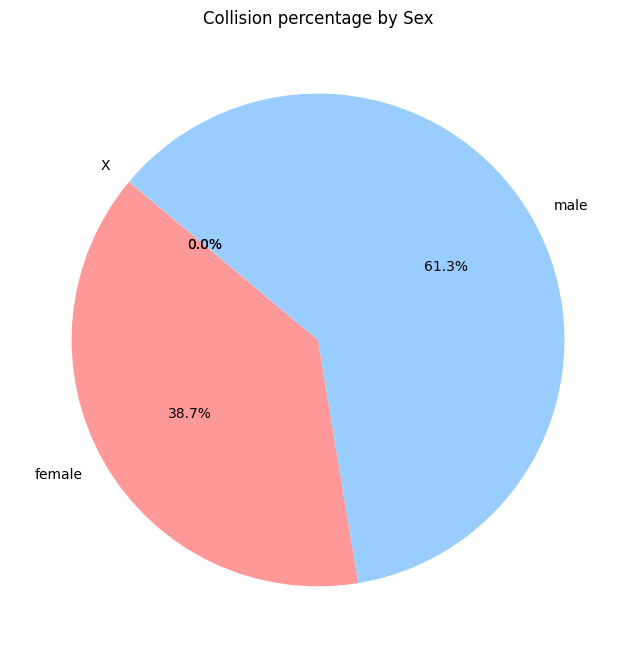

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,8))
plt.pie(df_parties_sex['percentage'], labels=df_parties_sex['party_sex'], autopct='%1.1f%%', startangle=140, colors= [ (1, 0.6, 0.6, 1),(0.6, 0.8, 1, 1)])
plt.title('Collision percentage by Sex')
plt.show()



In [ ]:
#party age 
df_parties_age=pd.read_sql_query(
    """select party_age, count(party_age) as count_age
    from parties
    WHERE party_type='driver'
    GROUP BY party_age 
     """, conn)

#clean missing data 
df_parties_age = df_parties_age.dropna() 
#clean duplicate data 
df_parties_age = df_parties_age.drop_duplicates()

df_parties_age

,party_age,count_age
1,0.0,1505
2,1.0,198
3,2.0,145
4,3.0,196
5,4.0,220
...,...,...
122,121.0,11
123,122.0,6
124,123.0,3
125,124.0,3


In [ ]:
# Create a line chart
plt.figure(figsize=(15, 6))
plt.plot(df_parties_age['party_age'], df_parties_age['count_age'], marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Collision Count')
plt.title(' Collision driver count by Age')
plt.grid(True)
plt.show()

AttributeError: module 'matplotlib' has no attribute 'figure'

OSError: no library called "cairo-2" was found
no library called "cairo" was found
no library called "libcairo-2" was found
cannot load library 'libcairo.so.2': dlopen(libcairo.so.2, 0x0002): tried: 'libcairo.so.2' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file, not in dyld cache), 'libcairo.so.2' (no such file), '/usr/lib/libcairo.so.2' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.so.2'
cannot load library 'libcairo.2.dylib': dlopen(libcairo.2.dylib, 0x0002): tried: 'libcairo.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo.2.dylib' (no such file), '/usr/lib/libcairo.2.dylib' (no such file, not in dyld cache), 'libcairo.2.dylib' (no such file), '/usr/lib/libcairo.2.dylib' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo.2.dylib'
cannot load library 'libcairo-2.dll': dlopen(libcairo-2.dll, 0x0002): tried: 'libcairo-2.dll' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibcairo-2.dll' (no such file), '/usr/lib/libcairo-2.dll' (no such file, not in dyld cache), 'libcairo-2.dll' (no such file), '/usr/lib/libcairo-2.dll' (no such file, not in dyld cache).  Additionally, ctypes.util.find_library() did not manage to locate a library called 'libcairo-2.dll'

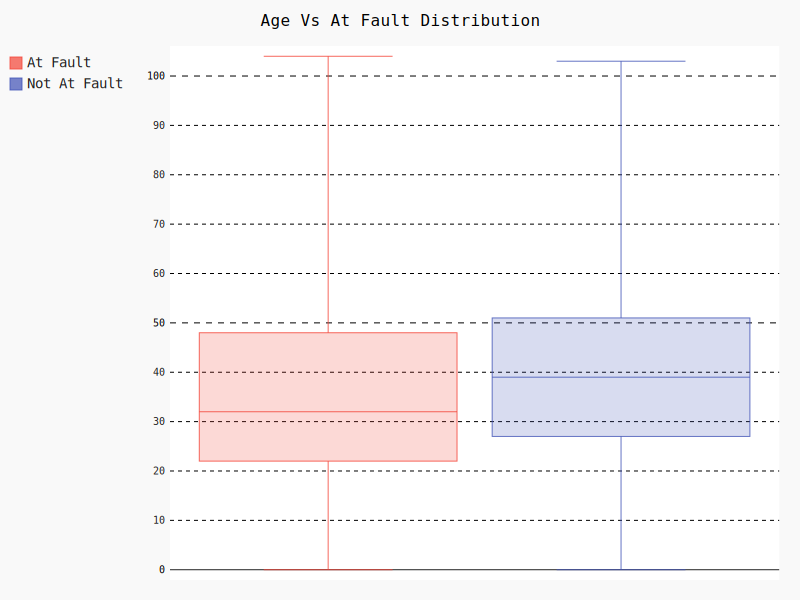

In [ ]:
#age distribution of people at fault 
import pygal

df_parties=pd.read_sql_query(
    """select * from parties
    LIMIT 200000""", conn)

box_plot = pygal.Box()
box_plot.title = 'Age Vs At Fault Distribution'
box_plot.add('At Fault',df_parties[df_parties['at_fault']==1]['party_age'].dropna().values)
box_plot.add('Not At Fault',df_parties[df_parties['at_fault']==0]['party_age'].dropna().values)
display(box_plot)

In [ ]:
df_year_total = pd.read_sql_query(
    """
    SELECT STRFTIME('%Y', collision_date) AS Year, COUNT(case_id) AS Number_of_road_accidents
    FROM collisions
    GROUP BY Year;
    """, conn)


fig_year_total = px.line(
    df_year_total,
    x = 'Year',
    y = 'Number_of_road_accidents',
    line_shape = 'spline',
    markers = True,
    title = 'Recorded traffic incidents over the years')

fig_year_total.update_layout(plot_bgcolor = plot_bgcolor)
fig_year_total.update_traces(line_color = plot_linecolor)
fig_year_total.show()


collision area plot

In [ ]:
#what race is most involved in the collision?
df_race=pd.read_sql_query(
    """SELECT party_race, count(*) as 'number of collision'
FROM parties
WHERE (party_race is not null)
GROUP BY party_race
ORDER BY count(*) DESC;""",conn)

#clean missing data 
df_race = df_race.dropna() 
#clean duplicate data 
df_race = df_race.drop_duplicates()


df_race


,party_race,number of collision
0,white,5932763
1,hispanic,5013959
2,black,1267606
3,asian,1139060
4,other,941649


Races distribution in California data

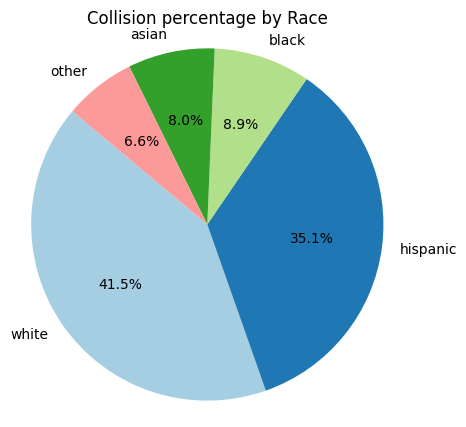

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

colors = plt.cm.Paired(range(len(df_race)))

plt.figure(figsize=(5, 5))
plt.pie(df_race['number of collision'], labels=df_race['party_race'], autopct='%1.1f%%', colors=colors, startangle=140)
plt.axis('equal')  # make sure the ratio of pie chart
plt.title('Collision percentage by Race')

plt.show()

In [ ]:
#count collision happend when sunrise
df_sunrise= pd.read_sql_query(
    """SELECT count(collision_time) as collision_number_rise
        FROM collisions
        WHERE collision_time between '06:00:00' and '08:00:00';""",conn)


#count collision happend when sunset
df_sunset= pd.read_sql_query(
    """SELECT count(collision_time) as collision_number_set
        FROM collisions
        WHERE collision_time between '18:00:00' and '20:00:00';""",conn)


#clean missing data 
df_sunset = df_sunset.dropna() 
#clean duplicate data 
df_sunset = df_sunset.drop_duplicates()


df_sun= pd.concat([df_sunrise,df_sunset],axis=1)
df_sun

,collision_number_rise,collision_number_set
0,782121,1045757


In [ ]:
#collisions in different area

df_area=pd.read_sql_query(
    """SELECT county_location, count(case_id) as count_accident
FROM collisions
GROUP BY county_location
ORDER BY count_accident DESC;""",conn)

#clean missing data 
df_area = df_area.dropna() 
#clean duplicate data 
df_area = df_area.drop_duplicates()

df_area.head(10)

,county_location,count_accident
0,los angeles,2851925
1,orange,728565
2,san bernardino,569376
3,san diego,535596
4,riverside,493758
5,alameda,466969
6,sacramento,403575
7,santa clara,342603
8,contra costa,217025
9,san joaquin,209185


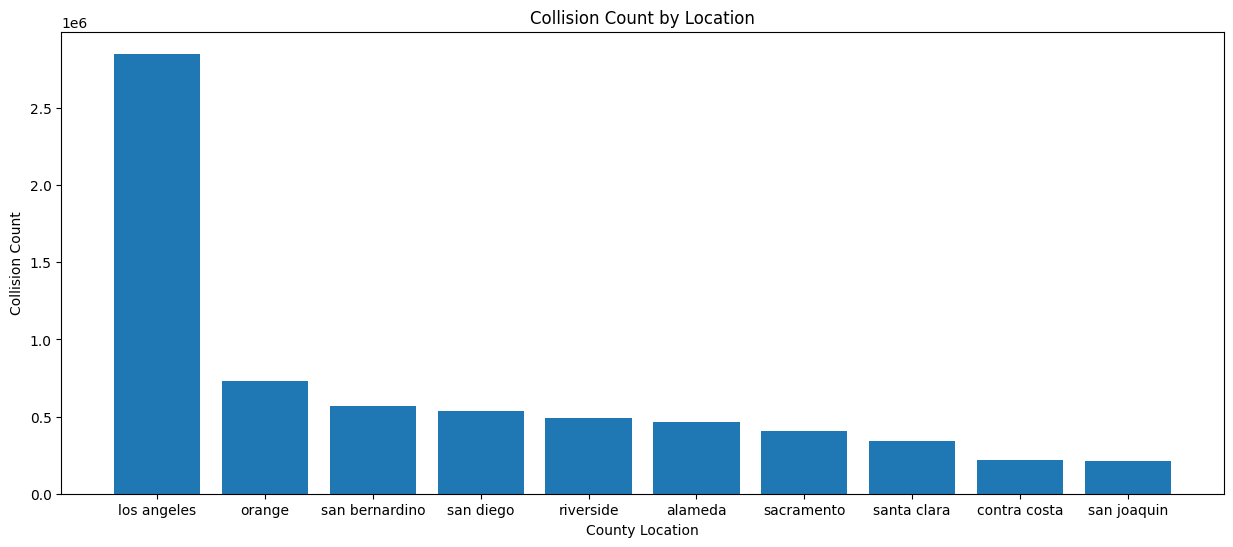

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


df_10= df_area.head(10)

plt.figure(figsize=(15, 6))
plt.bar(df_10['county_location'], df_10['count_accident'])
plt.xlabel('County Location')
plt.ylabel('Collision Count')
plt.title('Collision Count by Location')
plt.show()


In [6]:
#collision for drunkness

df_age_drunk=pd.read_sql_query(
    """SELECT party_age,
       SUM(CASE WHEN alcohol_involved IS NOT NULL THEN alcohol_involved ELSE 0 END) AS total_alcohol_involved,
       COUNT(*) AS total_collision
        FROM collisions
        LEFT join parties
        on collisions.case_id = parties.case_id
        WHERE party_age IS NOT NULL
        GROUP BY party_age""", conn)

df_age_drunk['percentage'] = (df_age_drunk['total_alcohol_involved'] / df_age_drunk['total_collision'].sum()) * 100

df_age_drunk

,party_age,total_alcohol_involved,total_collision,percentage
0,0,251,2176,0.001593
1,1,79,1501,0.000501
2,2,79,2234,0.000501
3,3,122,2828,0.000774
4,4,115,3280,0.000730
...,...,...,...,...
121,121,0,11,0.000000
122,122,0,6,0.000000
123,123,0,3,0.000000
124,124,0,3,0.000000


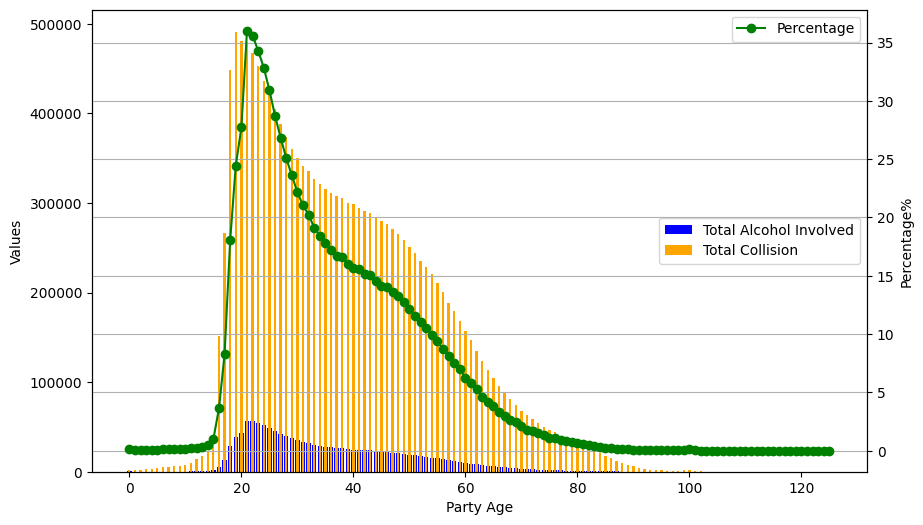

In [9]:
import matplotlib.pyplot as plt

# 建立圖表和子圖
fig, ax1 = plt.subplots(figsize=(10, 6))

# 繪製 bar chart (左軸)
ax1.bar(df_age_drunk['party_age'], df_age_drunk['total_alcohol_involved'], color='blue', label='Total Alcohol Involved', width=0.8)
# ax1.bar(np.array(df_age_drunk['party_age']) - 0.2, df_age_drunk['total_alcohol_involved'], width=0.4, color='blue', label='Total Alcohol Involved')

# ax1.bar(df_age_drunk['party_age'], df_age_drunk['total_collision'], color='orange', label='Total Collision')
ax1.bar(df_age_drunk['party_age'], np.array(df_age_drunk['total_collision']), color='orange', label='Total Collision', width=0.4)

ax1.set_xlabel('Party Age')
ax1.set_ylabel('Values')
ax1.tick_params(axis='y')
ax1.legend(loc='center right')

# 建立第二個 y 軸並繪製折線圖 (右軸)
ax2 = ax1.twinx()
ax2.plot(df_age_drunk['party_age'], df_age_drunk['percentage'] * 100, color='green', marker='o', linestyle='-', label='Percentage')
ax2.set_ylabel('Percentage%')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.grid(True)
# 顯示圖表
plt.show()

In [11]:
#collision for drunkness

df_holiday_collision=pd.read_sql_query(
    """SELECT strftime('%Y', collision_date) AS year,
       SUM(CASE WHEN strftime('%m-%d', collision_date) = '01-01' THEN 1 ELSE 0 END) AS New_Years_Day,
       SUM(CASE WHEN strftime('%m-%d', collision_date) = '06-19' THEN 1 ELSE 0 END) AS Juneteenth,
       SUM(CASE WHEN strftime('%m-%d', collision_date) = '07-04' THEN 1 ELSE 0 END) AS Independence_Day,
       SUM(CASE WHEN strftime('%m-%d', collision_date) = '09-03' THEN 1 ELSE 0 END) AS Labor_Day,
       SUM(CASE WHEN strftime('%m-%d', collision_date) = '10-31' THEN 1 ELSE 0 END) AS Halloween,
       SUM(CASE WHEN strftime('%m-%d', collision_date) = '11-11' THEN 1 ELSE 0 END) AS Veterans_Day,
       SUM(CASE WHEN strftime('%m-%d', collision_date) = '11-22' THEN 1 ELSE 0 END) AS Thanksgiving_Day,
       SUM(CASE WHEN strftime('%m-%d', collision_date) = '12-25' THEN 1 ELSE 0 END) AS Christmas_Day
        FROM collisions
        WHERE collision_date BETWEEN '2001-01-01' AND '2021-12-31'
        GROUP BY year""", conn)

df_holiday_collision

,year,New_Years_Day,Juneteenth,Independence_Day,Labor_Day,Halloween,Veterans_Day,Thanksgiving_Day,Christmas_Day
0,2001,1000,1449,1104,975,1680,1359,1090,867
1,2002,1070,1488,1165,1691,1774,1272,1690,871
2,2003,1090,1361,1321,1664,2479,1337,1460,1448
3,2004,1244,1391,1287,1746,1301,1547,1435,918
4,2005,1124,1189,1230,1262,1786,1467,1717,1015
5,2006,1427,1368,1180,717,1671,1500,1631,821
6,2007,1014,1393,1167,1021,1558,1225,943,766
7,2008,885,1212,1082,1328,1709,988,1136,1029
8,2009,1001,1372,999,1243,1172,937,832,720
9,2010,801,1089,1001,1374,1033,1008,1185,783


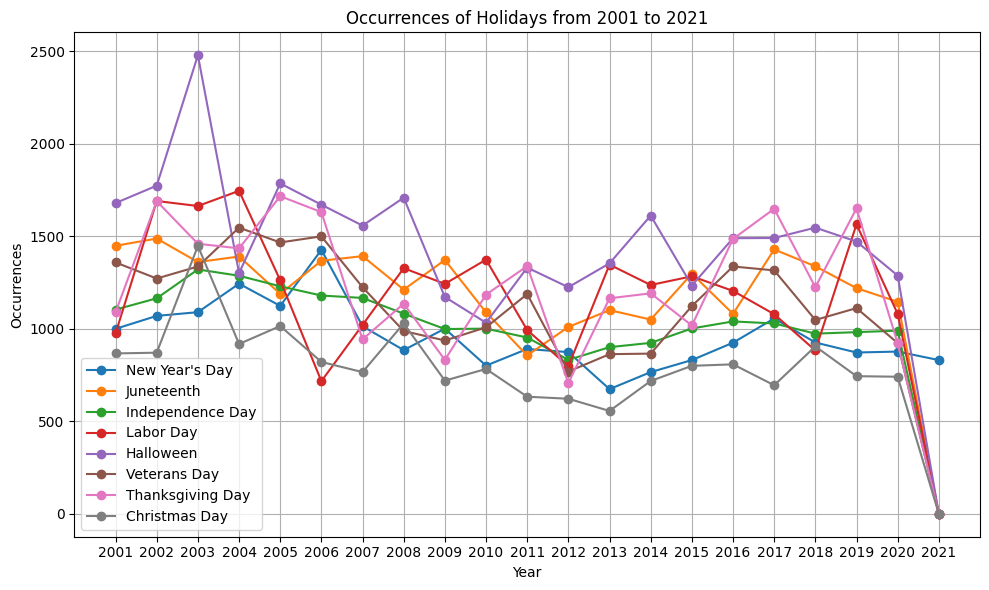

In [26]:
# Data for the line chart
years = [
    2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 
    2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 
    2019, 2020, 2021
]

New_Years_Day = [1000, 1070, 1090, 1244, 1124, 1427, 1014, 885, 1001, 801, 891, 874, 674, 766, 831, 925, 1056, 926, 872, 877, 831]
Juneteenth = [1449, 1488, 1361, 1391, 1189, 1368, 1393, 1212, 1372, 1089, 856, 1010, 1101, 1050, 1298, 1081, 1429, 1338, 1220, 1146, 0]
Independence_Day = [1104, 1165, 1321, 1287, 1230, 1180, 1167, 1082, 999, 1001, 953, 832, 901, 924, 1002, 1040, 1029, 974, 982, 990, 0]
Labor_Day = [975, 1691, 1664, 1746, 1262, 717, 1021, 1328, 1243, 1374, 993, 798, 1347, 1237, 1284, 1205, 1079, 883, 1565, 1081, 0]
Halloween = [1680, 1774, 2479, 1301, 1786, 1671, 1558, 1709, 1172, 1033, 1331, 1225, 1354, 1612, 1234, 1490, 1491, 1547, 1472, 1288, 0]
Veterans_Day = [1359, 1272, 1337, 1547, 1467, 1500, 1225, 988, 937, 1008, 1188, 769, 863, 866, 1123, 1337, 1316, 1048, 1112, 923, 0]
Thanksgiving_Day = [1090, 1690, 1460, 1435, 1717, 1631, 943, 1136, 832, 1185, 1339, 707, 1165, 1192, 1018, 1486, 1649, 1225, 1651, 922, 0]
Christmas_Day = [867, 871, 1448, 918, 1015, 821, 766, 1029, 720, 783, 633, 622, 556, 718, 800, 808, 695, 905, 744, 741, 0]

# Create the line chart
plt.figure(figsize=(10, 6))

# plt.plot(np.array(df_holiday_collision['year']), New_Years_Day, marker='o', label="New Year's Day")
plt.plot(df_holiday_collision['year'], df_holiday_collision['New_Years_Day'], marker='o', label="New Year's Day")
plt.plot(df_holiday_collision['year'], df_holiday_collision['Juneteenth'], marker='o', label="Juneteenth")
plt.plot(df_holiday_collision['year'], df_holiday_collision['Independence_Day'], marker='o', label="Independence Day")
plt.plot(df_holiday_collision['year'], df_holiday_collision['Labor_Day'], marker='o', label="Labor Day")
plt.plot(df_holiday_collision['year'], df_holiday_collision['Halloween'], marker='o', label="Halloween")
plt.plot(df_holiday_collision['year'], df_holiday_collision['Veterans_Day'], marker='o', label="Veterans Day")
plt.plot(df_holiday_collision['year'], df_holiday_collision['Thanksgiving_Day'], marker='o', label="Thanksgiving Day")
plt.plot(df_holiday_collision['year'], df_holiday_collision['Christmas_Day'], marker='o', label="Christmas Day")

plt.xlabel('Year')
plt.ylabel('Occurrences')
plt.title('Occurrences of Holidays from 2001 to 2021')
plt.legend()
plt.grid(True)
plt.xticks(df_holiday_collision['year'])  # Show all years on x-axis

plt.tight_layout()
plt.show()